In [ ]:
!gdown 1ezhER7P8PHOhtGcV0q8xl2YxJxzTIVVq
!ls

Downloading...
From: https://drive.google.com/uc?id=1ezhER7P8PHOhtGcV0q8xl2YxJxzTIVVq
To: /content/converted_data.csv
100% 63.0k/63.0k [00:00<00:00, 88.8MB/s]
converted_data.csv  report.log	sample_data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('converted_data.csv')
df.head()
df.describe()
df=df.drop(df.columns[-1], axis=1)
df.head()

,id,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,...,om2,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef,junk
0,1254.0,0.0,40.0,1.0,1.0,0.0,0.0,-9.0,2.0,140.0,...,-9.0,-9.0,-9.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0
1,1255.0,0.0,49.0,0.0,1.0,0.0,0.0,-9.0,3.0,160.0,...,-9.0,-9.0,-9.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0
2,1256.0,0.0,37.0,1.0,1.0,0.0,0.0,-9.0,2.0,130.0,...,-9.0,-9.0,-9.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0
3,1257.0,0.0,48.0,0.0,1.0,1.0,1.0,-9.0,4.0,138.0,...,-9.0,2.0,-9.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0
4,1258.0,0.0,54.0,1.0,1.0,0.0,1.0,-9.0,3.0,150.0,...,-9.0,1.0,-9.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0


Data Exploration


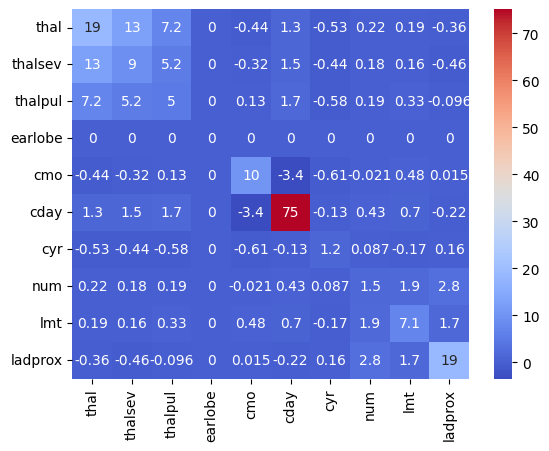

In [ ]:
covariance_matrix=df.iloc[:,50:60].cov()
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm')
plt.show()


Pre-processing

Analyse Nan values,and drop certain certain features

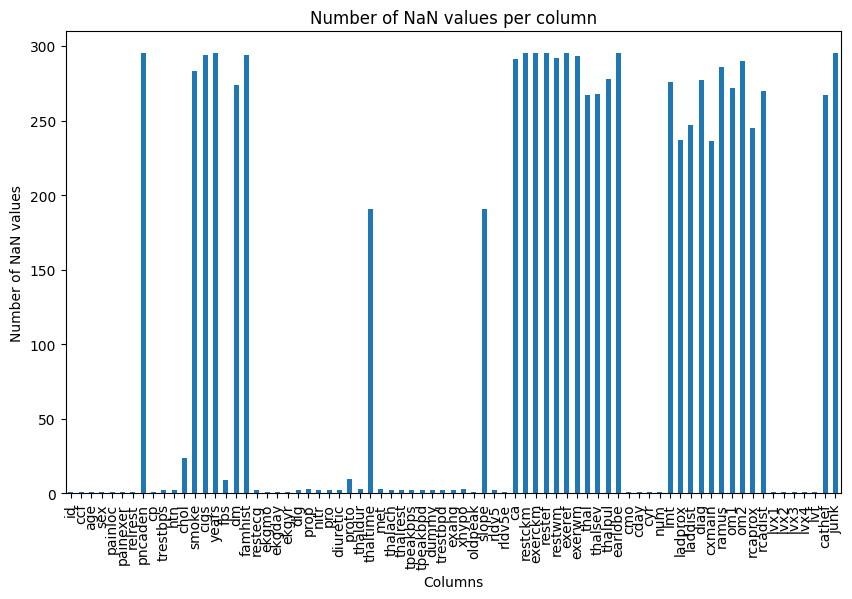

In [ ]:
df.replace(-9, np.nan, inplace=True)
df.head()
# print(df.isna().sum())

nan_count = df.isna().sum()
plt.figure(figsize=(10, 6))
nan_count.plot(kind='bar')
plt.title('Number of NaN values per column')
plt.xlabel('Columns')
plt.ylabel('Number of NaN values')
plt.show()


In [ ]:
df_copy=df
df = df.dropna(axis=1, thresh=len(df) - 150)
df.shape

(295, 44)

Handling Nan Values

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df.head()

,id,ccf,age,sex,painloc,painexer,relrest,cp,trestbps,htn,...,rldv5e,cmo,cday,cyr,num,lvx1,lvx2,lvx3,lvx4,lvf
0,1254.0,0.0,40.0,1.0,1.0,0.0,0.0,2.0,140.0,0.0,...,20.0,12.0,20.0,84.0,0.0,1.0,1.0,1.0,1.0,1.0
1,1255.0,0.0,49.0,0.0,1.0,0.0,0.0,3.0,160.0,1.0,...,13.0,11.0,20.0,84.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1256.0,0.0,37.0,1.0,1.0,0.0,0.0,2.0,130.0,0.0,...,14.0,11.0,26.0,84.0,0.0,1.0,1.0,1.0,1.0,1.0
3,1257.0,0.0,48.0,0.0,1.0,1.0,1.0,4.0,138.0,0.0,...,22.0,9.0,30.0,84.0,3.0,1.0,1.0,1.0,1.0,1.0
4,1258.0,0.0,54.0,1.0,1.0,0.0,1.0,3.0,150.0,0.0,...,9.0,7.0,30.0,84.0,0.0,1.0,1.0,1.0,1.0,1.0


Preprocessing
Variance Threshold

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0)

df_var=selector.fit(df)
retained_indices = selector.get_support(indices=True)
removed_indices = [i for i in range(df.shape[1]) if i not in retained_indices]
removed_columns = [df.columns[i] for i in removed_indices]

print("Removed feature names:", removed_columns)


Removed feature names: ['ccf', 'dig', 'lvx1']


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

pipeline = Pipeline([
    ('variance_threshold', selector),
    ('standard_scaler', standard_scaler),
    ('min_max_scaler', min_max_scaler)
])

df_transformed = pipeline.fit_transform(df)
df_transformed.shape

selected_columns = df.columns[selector.get_support()]
df_transformed = pd.DataFrame(df_transformed, columns=selected_columns)
df_transformed

,id,age,sex,painloc,painexer,relrest,cp,trestbps,htn,chol,...,rldv5,rldv5e,cmo,cday,cyr,num,lvx2,lvx3,lvx4,lvf
0,0.063234,0.315789,1.0,1.0,0.0,0.0,0.333333,0.444444,0.0,0.393822,...,0.821429,0.642857,1.000000,0.633333,0.25,0.00,0.0,0.0,0.0,0.0
1,0.063484,0.552632,0.0,1.0,0.0,0.0,0.666667,0.629630,1.0,0.183398,...,0.392857,0.392857,0.909091,0.633333,0.25,0.25,0.0,0.0,0.0,0.0
2,0.063734,0.236842,1.0,1.0,0.0,0.0,0.333333,0.351852,0.0,0.382239,...,0.500000,0.428571,0.909091,0.833333,0.25,0.00,0.0,0.0,0.0,0.0
3,0.063984,0.526316,0.0,1.0,1.0,1.0,1.000000,0.425926,0.0,0.249035,...,0.571429,0.714286,0.727273,0.966667,0.25,0.75,0.0,0.0,0.0,0.0
4,0.064234,0.684211,1.0,1.0,0.0,1.0,0.666667,0.537037,0.0,0.305019,...,0.357143,0.250000,0.545455,0.966667,0.25,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,0.013247,0.210526,1.0,1.0,0.0,0.0,0.333333,0.259259,0.0,0.156371,...,0.357143,0.392857,0.181818,0.533333,0.50,0.00,0.0,0.0,0.0,0.0
291,0.999750,0.526316,1.0,0.0,0.0,0.0,0.666667,0.166667,0.0,0.243243,...,0.250000,0.285714,0.181818,0.900000,0.50,0.00,0.0,0.0,0.0,0.0
292,0.999500,0.500000,0.0,0.0,0.0,0.0,0.333333,0.444444,1.0,0.332046,...,0.392857,0.392857,0.181818,0.166667,0.75,0.00,0.0,0.0,0.0,0.0
293,1.000000,0.657895,1.0,1.0,1.0,1.0,1.000000,0.351852,0.0,0.187259,...,0.357143,0.357143,0.636364,0.133333,0.25,0.00,0.0,0.0,0.0,0.0


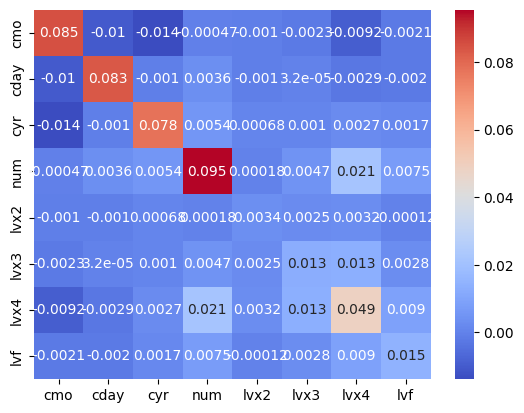

In [ ]:
covariance_matrix=df_transformed.iloc[:,33:41].cov()
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm')
plt.show()


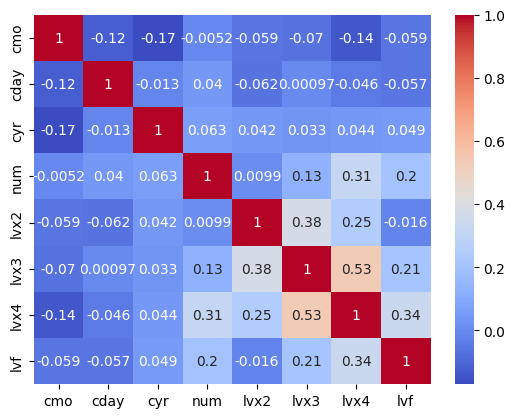

In [ ]:
correlation_matrix = df_transformed.iloc[:, 33:41].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:

df_transformed['num'] = (df_transformed['num'] > 0).astype(int)
df_transformed.head()

,id,age,sex,painloc,painexer,relrest,cp,trestbps,htn,chol,...,rldv5,rldv5e,cmo,cday,cyr,num,lvx2,lvx3,lvx4,lvf
0,0.063234,0.315789,1.0,1.0,0.0,0.0,0.333333,0.444444,0.0,0.393822,...,0.821429,0.642857,1.000000,0.633333,0.25,0,0.0,0.0,0.0,0.0
1,0.063484,0.552632,0.0,1.0,0.0,0.0,0.666667,0.629630,1.0,0.183398,...,0.392857,0.392857,0.909091,0.633333,0.25,1,0.0,0.0,0.0,0.0
2,0.063734,0.236842,1.0,1.0,0.0,0.0,0.333333,0.351852,0.0,0.382239,...,0.500000,0.428571,0.909091,0.833333,0.25,0,0.0,0.0,0.0,0.0
3,0.063984,0.526316,0.0,1.0,1.0,1.0,1.000000,0.425926,0.0,0.249035,...,0.571429,0.714286,0.727273,0.966667,0.25,1,0.0,0.0,0.0,0.0
4,0.064234,0.684211,1.0,1.0,0.0,1.0,0.666667,0.537037,0.0,0.305019,...,0.357143,0.250000,0.545455,0.966667,0.25,0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = df_transformed.drop('num', axis=1)
y = df_transformed['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.864406779661017
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89        33
           1       0.91      0.77      0.83        26

    accuracy                           0.86        59
   macro avg       0.87      0.85      0.86        59
weighted avg       0.87      0.86      0.86        59



In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report

# model = LogisticRegression(max_iter=1000)
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
# print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.864406779661017
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89        33
           1       0.91      0.77      0.83        26

    accuracy                           0.86        59
   macro avg       0.87      0.85      0.86        59
weighted avg       0.87      0.86      0.86        59



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred))


Decision Tree Accuracy: 0.7457627118644068
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.88      0.79        33
           1       0.79      0.58      0.67        26

    accuracy                           0.75        59
   macro avg       0.76      0.73      0.73        59
weighted avg       0.75      0.75      0.74        59



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))


Random Forest Accuracy: 0.8305084745762712
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86        33
           1       0.90      0.69      0.78        26

    accuracy                           0.83        59
   macro avg       0.85      0.82      0.82        59
weighted avg       0.84      0.83      0.83        59



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

model = SVC(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("SVM Classification Report:\n", classification_report(y_test, y_pred))


SVM Accuracy: 0.8813559322033898
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90        33
           1       0.95      0.77      0.85        26

    accuracy                           0.88        59
   macro avg       0.90      0.87      0.88        59
weighted avg       0.89      0.88      0.88        59



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("KNN Classification Report:\n", classification_report(y_test, y_pred))


KNN Accuracy: 0.864406779661017
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89        33
           1       0.95      0.73      0.83        26

    accuracy                           0.86        59
   macro avg       0.89      0.85      0.86        59
weighted avg       0.88      0.86      0.86        59



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred))


Naive Bayes Accuracy: 0.9152542372881356
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93        33
           1       0.96      0.85      0.90        26

    accuracy                           0.92        59
   macro avg       0.92      0.91      0.91        59
weighted avg       0.92      0.92      0.91        59



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred))


Gradient Boosting Accuracy: 0.8305084745762712
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86        33
           1       0.90      0.69      0.78        26

    accuracy                           0.83        59
   macro avg       0.85      0.82      0.82        59
weighted avg       0.84      0.83      0.83        59



In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from pyswarms.single import GlobalBestPSO

def objective_function(params):
    n_estimators = int(params[:, 0][0])
    learning_rate = params[:, 1][0]
    max_depth = int(params[:, 2][0])
    model = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        random_state=42
    )
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=3)
    return -scores.mean()

lb = [50, 0.01, 3]
ub = [300, 0.3, 10]
bounds = (lb, ub)

optimizer = GlobalBestPSO(n_particles=10, dimensions=3, options={'c1': 0.5, 'c2': 0.3, 'w': 0.9}, bounds=bounds)
best_cost, best_pos = optimizer.optimize(objective_function, iters=20)

best_n_estimators = int(best_pos[0])
best_learning_rate = best_pos[1]
best_max_depth = int(best_pos[2])

final_model = GradientBoostingClassifier(
    n_estimators=best_n_estimators,
    learning_rate=best_learning_rate,
    max_depth=best_max_depth,
    random_state=42
)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred))


2024-11-26 10:08:29,703 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|20/20, best_cost=-0.788
2024-11-26 10:08:59,610 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.7882722059937249, best pos: [2.32993883e+02 1.01861548e-01 3.97388567e+00]


Gradient Boosting Accuracy: 0.7966101694915254
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.91      0.83        33
           1       0.85      0.65      0.74        26

    accuracy                           0.80        59
   macro avg       0.81      0.78      0.79        59
weighted avg       0.80      0.80      0.79        59



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

model = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=3, verbose=1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Best GridSearch Accuracy (Train CV):", grid_search.best_score_)
print("Gradient Boosting Test Accuracy:", accuracy_score(y_test, y_pred))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150}
Best GridSearch Accuracy (Train CV): 0.7882181110029212
Gradient Boosting Test Accuracy: 0.7796610169491526
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.91      0.82        33
           1       0.84      0.62      0.71        26

    accuracy                           0.78        59
   macro avg       0.80      0.76      0.77        59
weighted avg       0.79      0.78      0.77        59



In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred))


XGBoost Accuracy: 0.8135593220338984
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.94      0.85        33
           1       0.89      0.65      0.76        26

    accuracy                           0.81        59
   macro avg       0.83      0.80      0.80        59
weighted avg       0.83      0.81      0.81        59



In [ ]:
!pip install deap

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from deap import base, creator, tools, algorithms
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import random

def fitness(individual):
    n_estimators = int(individual[0])
    learning_rate = max(0.01, individual[1])  # Ensure positive learning rate
    max_depth = int(individual[2])

    model = XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy,

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_n_estimators", random.randint, 50, 300)
toolbox.register("attr_learning_rate", random.uniform, 0.01, 0.3)
toolbox.register("attr_max_depth", random.randint, 3, 10)

toolbox.register("individual", tools.initCycle, creator.Individual, (toolbox.attr_n_estimators, toolbox.attr_learning_rate, toolbox.attr_max_depth), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", fitness)

population = toolbox.population(n=10)

generations = 20
cx_prob = 0.7
mut_prob = 0.2

result = algorithms.eaSimple(population, toolbox, cxpb=cx_prob, mutpb=mut_prob, ngen=generations,
                              stats=None, halloffame=None, verbose=True)

best_individual = tools.selBest(population, 1)[0]
best_n_estimators = int(best_individual[0])
best_learning_rate = best_individual[1]
best_max_depth = int(best_individual[2])

best_model = XGBClassifier(n_estimators=best_n_estimators, learning_rate=best_learning_rate, max_depth=best_max_depth, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("Best Model Accuracy:", accuracy_score(y_test, y_pred))
print("Best Model Classification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	10    
1  	8     
2  	8     
3  	5     
4  	10    
5  	6     
6  	8     
7  	8     
8  	8     
9  	5     
10 	8     
11 	10    
12 	9     
13 	7     
14 	8     
15 	8     
16 	10    
17 	8     
18 	10    
19 	4     
20 	8     
Best Model Accuracy: 0.8135593220338984
Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.94      0.85        33
           1       0.89      0.65      0.76        26

    accuracy                           0.81        59
   macro avg       0.83      0.80      0.80        59
weighted avg       0.83      0.81      0.81        59



In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from pyswarms.single import GlobalBestPSO

def objective_function(params):
    n_estimators = int(params[:, 0][0])
    learning_rate = params[:, 1][0]
    max_depth = int(params[:, 2][0])
    model = XGBClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    )
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=3)
    return -scores.mean()

lb = [50, 0.01, 3]
ub = [300, 0.3, 10]
bounds = (lb, ub)

optimizer = GlobalBestPSO(n_particles=10, dimensions=3, options={'c1': 0.5, 'c2': 0.3, 'w': 0.9}, bounds=bounds)
best_cost, best_pos = optimizer.optimize(objective_function, iters=20)

best_n_estimators = int(best_pos[0])
best_learning_rate = best_pos[1]
best_max_depth = int(best_pos[2])

final_model = XGBClassifier(
    n_estimators=best_n_estimators,
    learning_rate=best_learning_rate,
    max_depth=best_max_depth,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred))


2024-11-26 10:09:26,173 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/20/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:09:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:09:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:09:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
pyswarms.single.global_best:   5%|▌         |1/20, best_cost=-0.784/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:09:27] WARNING: /workspace/src/learner.cc:740: 

XGBoost Accuracy: 0.8135593220338984
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.94      0.85        33
           1       0.89      0.65      0.76        26

    accuracy                           0.81        59
   macro avg       0.83      0.80      0.80        59
weighted avg       0.83      0.81      0.81        59



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

model = AdaBoostClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred))
print("AdaBoost Classification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.8135593220338984
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.94      0.85        33
           1       0.89      0.65      0.76        26

    accuracy                           0.81        59
   macro avg       0.83      0.80      0.80        59
weighted avg       0.83      0.81      0.81        59



In [ ]:
!pip install pyswarms


In [ ]:
# !pip install pyswarms

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from pyswarms.single import GlobalBestPSO
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

def objective_function(params):
    params = params.flatten()
    n_estimators = int(params[0])
    learning_rate = params[1]

    model = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)

    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=3)
    return -scores.mean()

bounds = (np.array([50, 0.01]), np.array([200, 1.0]))

optimizer = GlobalBestPSO(n_particles=10, dimensions=2, options={'c1': 0.5, 'c2': 0.3, 'w': 0.9}, bounds=bounds)
best_cost, best_pos = optimizer.optimize(objective_function, iters=20)

best_n_estimators = int(best_pos[0])
best_learning_rate = best_pos[1]

final_model = AdaBoostClassifier(n_estimators=best_n_estimators, learning_rate=best_learning_rate, random_state=42)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

print("Final AdaBoost Accuracy:", accuracy_score(y_test, y_pred))
print("Final AdaBoost Classification Report:\n", classification_report(y_test, y_pred))


2024-11-26 10:10:04,430 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/20/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
pyswarms.single.global_best:   5%|▌         |1/20, best_cost=-0.763/usr/local/lib/python3.10/dis

Final AdaBoost Accuracy: 0.8305084745762712
Final AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.97      0.86        33
           1       0.94      0.65      0.77        26

    accuracy                           0.83        59
   macro avg       0.86      0.81      0.82        59
weighted avg       0.85      0.83      0.82        59



In [ ]:
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score, classification_report

model = NearestCentroid()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Nearest Centroid Accuracy:", accuracy_score(y_test, y_pred))
print("Nearest Centroid Classification Report:\n", classification_report(y_test, y_pred))


Nearest Centroid Accuracy: 0.8983050847457628
Nearest Centroid Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91        33
           1       0.92      0.85      0.88        26

    accuracy                           0.90        59
   macro avg       0.90      0.89      0.90        59
weighted avg       0.90      0.90      0.90        59



In [ ]:
import numpy as np
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from deap import base, creator, tools, algorithms
import random

# Assuming X_train, X_test, y_train, y_test are already defined as per your dataset
# Replace the following with your actual dataset
# Example:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def fitness(individual):
    metric = individual[0]
    shrink_threshold = individual[1]

    model = NearestCentroid(metric=metric, shrink_threshold=shrink_threshold)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy,

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_metric", random.choice, ['euclidean', 'manhattan'])
toolbox.register("attr_shrink_threshold", random.uniform, 0.0, 1.0)

toolbox.register("individual", tools.initCycle, creator.Individual, (toolbox.attr_metric, toolbox.attr_shrink_threshold), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)

# Custom mutation function: mutate only shrink_threshold
def mutate_shrink_threshold(individual):
    metric = individual[0]  # Keep the metric unchanged
    shrink_threshold = individual[1]  # Mutate the numeric shrink_threshold
    shrink_threshold += random.gauss(0, 0.1)  # Gaussian mutation for shrink_threshold

    individual[1] = max(0.0, min(1.0, shrink_threshold))  # Ensure shrink_threshold is within the bounds [0, 1]
    return individual,

toolbox.register("mutate", mutate_shrink_threshold)

toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", fitness)

population = toolbox.population(n=10)

generations = 20
cx_prob = 0.7
mut_prob = 0.2

result = algorithms.eaSimple(population, toolbox, cxpb=cx_prob, mutpb=mut_prob, ngen=generations,
                              stats=None, halloffame=None, verbose=True)

best_individual = tools.selBest(population, 1)[0]
best_metric = best_individual[0]
best_shrink_threshold = best_individual[1]

print("Best Hyperparameters Found:")
print(f"metric: {best_metric}")
print(f"shrink_threshold: {best_shrink_threshold}")

best_model = NearestCentroid(metric=best_metric, shrink_threshold=best_shrink_threshold)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("Best Model Accuracy:", accuracy_score(y_test, y_pred))
print("Best Model Classification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	10    
1  	8     
2  	8     
3  	9     
4  	10    
5  	7     
6  	8     
7  	8     
8  	10    
9  	5     
10 	9     
11 	8     
12 	6     
13 	7     
14 	8     
15 	6     
16 	10    
17 	8     
18 	9     
19 	10    
20 	7     
Best Hyperparameters Found:
metric: euclidean
shrink_threshold: 0.5977552347717046
Best Model Accuracy: 0.8983050847457628
Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91        33
           1       0.92      0.85      0.88        26

    accuracy                           0.90        59
   macro avg       0.90      0.89      0.90        59
weighted avg       0.90      0.90      0.90        59



In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import accuracy_score, classification_report

model = GaussianProcessClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Gaussian Process Accuracy:", accuracy_score(y_test, y_pred))
print("Gaussian Process Classification Report:\n", classification_report(y_test, y_pred))


Gaussian Process Accuracy: 0.8135593220338984
Gaussian Process Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.91      0.85        33
           1       0.86      0.69      0.77        26

    accuracy                           0.81        59
   macro avg       0.82      0.80      0.81        59
weighted avg       0.82      0.81      0.81        59



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

model = MLPClassifier(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MLP Classifier Accuracy:", accuracy_score(y_test, y_pred))
print("MLP Classifier Classification Report:\n", classification_report(y_test, y_pred))


MLP Classifier Accuracy: 0.847457627118644
MLP Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        33
           1       0.87      0.77      0.82        26

    accuracy                           0.85        59
   macro avg       0.85      0.84      0.84        59
weighted avg       0.85      0.85      0.85        59



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'LogisticRegression': 0.864406779661017, 'DecisionTreeClassifier': 0.7457627118644068, 'RandomForestClassifier': 0.8305084745762712, 'SVC': 0.8813559322033898, 'KNeighborsClassifier': 0.864406779661017, 'GaussianNB': 0.9152542372881356, 'GradientBoostingClassifier': 0.8305084745762712, 'AdaBoostClassifier': 0.8135593220338984, 'XGBClassifier': 0.8135593220338984, 'NearestCentroid': 0.8983050847457628, 'GaussianProcessClassifier': 0.8135593220338984, 'MLPClassifier': 0.847457627118644}


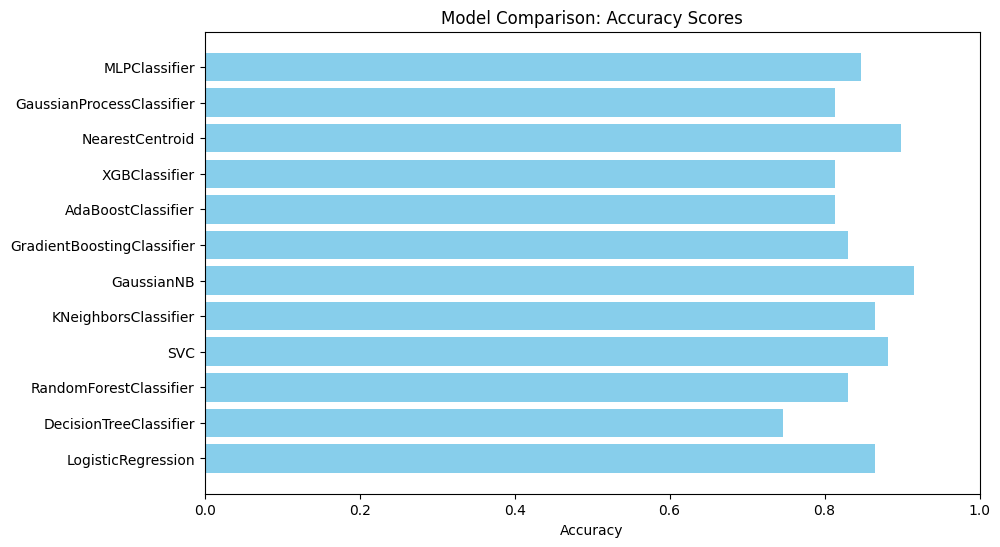

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

models = [
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    SVC(random_state=42),
    KNeighborsClassifier(),
    GaussianNB(),
    GradientBoostingClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    XGBClassifier(random_state=42),
    NearestCentroid(),
    GaussianProcessClassifier(),
    MLPClassifier(max_iter=1000, random_state=42)
]

model_accuracy_dict = {}

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracy_dict[type(model).__name__] = accuracy

print(model_accuracy_dict)

model_names = list(model_accuracy_dict.keys())
accuracy_scores = list(model_accuracy_dict.values())

plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Comparison: Accuracy Scores')
plt.xlim(0, 1)
plt.show()



    LogisticRegression: 0.864406779661017,
    'DecisionTreeClassifier': 0.7457627118644068,
    'RandomForestClassifier': 0.8305084745762712,
    'SVC': 0.8813559322033898,
    'KNeighborsClassifier': 0.864406779661017,
    'GaussianNB': 0.9152542372881356,
    'GradientBoostingClassifier': 0.8305084745762712,
    'AdaBoostClassifier': 0.8135593220338984,
    'XGBClassifier': 0.8135593220338984,
    'NearestCentroid': 0.8983050847457628,
    'GaussianProcessClassifier': 0.8135593220338984,
    'MLPClassifier': 0.847457627118644



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print("RandomForestClassifier Accuracy:", rf_accuracy)


RandomForestClassifier Accuracy: 0.8305084745762712


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

model = ExtraTreesClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of ExtraTreesClassifier:", accuracy)


Accuracy of ExtraTreesClassifier: 0.847457627118644


In [ ]:
# from sklearn.neighbors import RadiusNeighborsClassifier
# from sklearn.metrics import accuracy_score

# model = RadiusNeighborsClassifier(radius=1.0)
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy of RadiusNeighborsClassifier:", accuracy)


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

model1 = LogisticRegression()
model2 = GaussianNB()
model3 = KNeighborsClassifier()

voting_clf = VotingClassifier(estimators=[
    ('logreg', model1),
    ('gnb', model2),
    ('knn', model3)
], voting='soft')

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))


Voting Classifier Accuracy: 0.8983050847457628


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = BaggingClassifier(estimator=KNeighborsClassifier(), random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of BaggingClassifier with K-Neighbors:", accuracy)


Accuracy of BaggingClassifier with K-Neighbors: 0.847457627118644


In [ ]:
df_transformed.head()

,id,age,sex,painloc,painexer,relrest,cp,trestbps,htn,chol,...,rldv5,rldv5e,cmo,cday,cyr,num,lvx2,lvx3,lvx4,lvf
0,0.063234,0.315789,1.0,1.0,0.0,0.0,0.333333,0.444444,0.0,0.393822,...,0.821429,0.642857,1.000000,0.633333,0.25,0,0.0,0.0,0.0,0.0
1,0.063484,0.552632,0.0,1.0,0.0,0.0,0.666667,0.629630,1.0,0.183398,...,0.392857,0.392857,0.909091,0.633333,0.25,1,0.0,0.0,0.0,0.0
2,0.063734,0.236842,1.0,1.0,0.0,0.0,0.333333,0.351852,0.0,0.382239,...,0.500000,0.428571,0.909091,0.833333,0.25,0,0.0,0.0,0.0,0.0
3,0.063984,0.526316,0.0,1.0,1.0,1.0,1.000000,0.425926,0.0,0.249035,...,0.571429,0.714286,0.727273,0.966667,0.25,1,0.0,0.0,0.0,0.0
4,0.064234,0.684211,1.0,1.0,0.0,1.0,0.666667,0.537037,0.0,0.305019,...,0.357143,0.250000,0.545455,0.966667,0.25,0,0.0,0.0,0.0,0.0


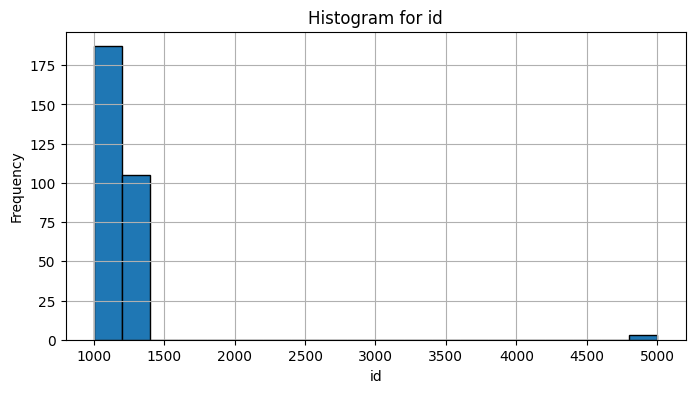

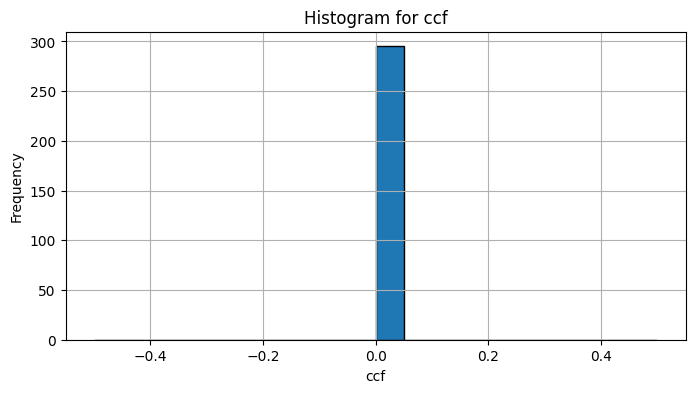

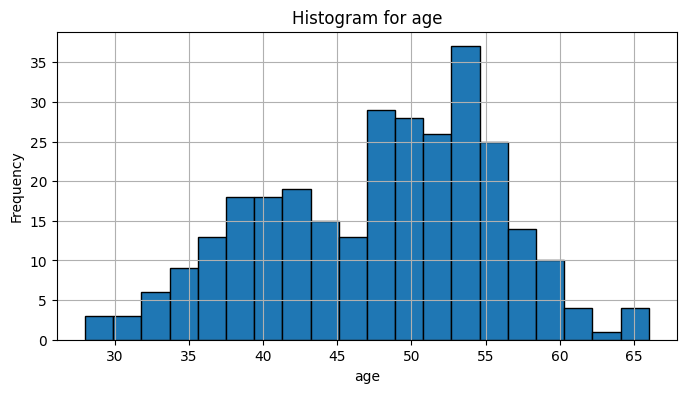

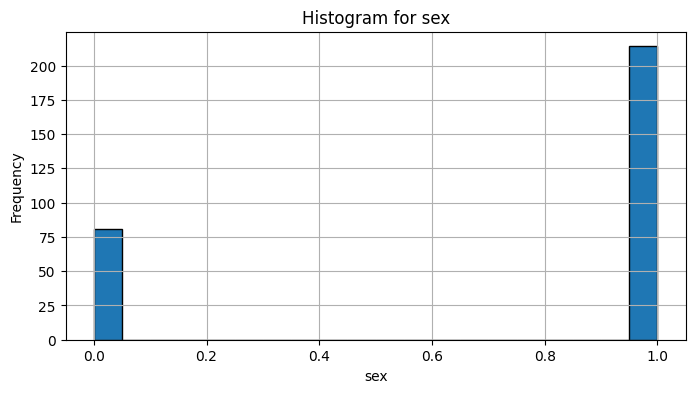

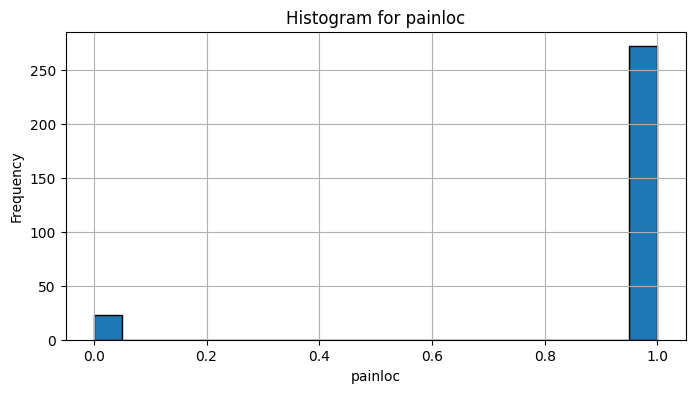

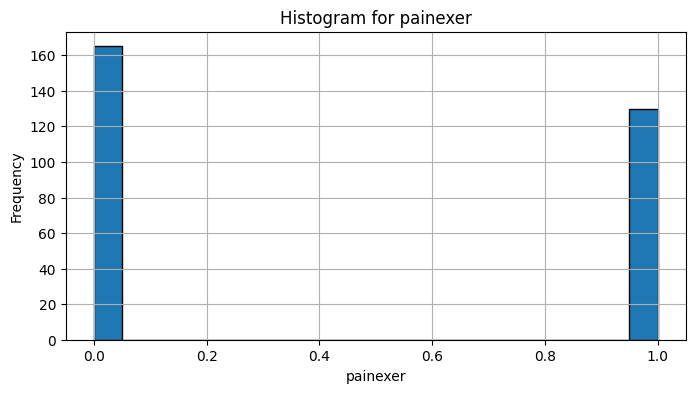

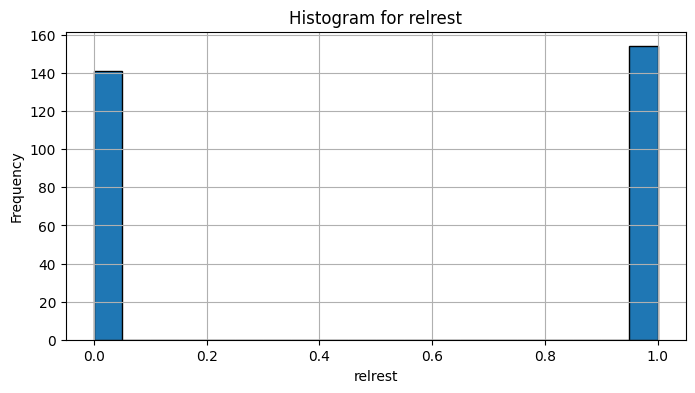

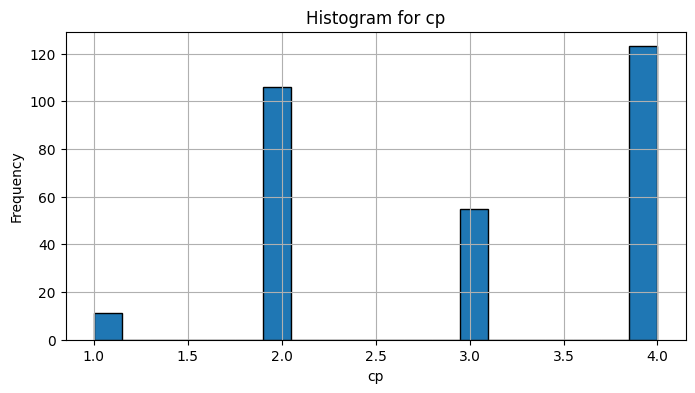

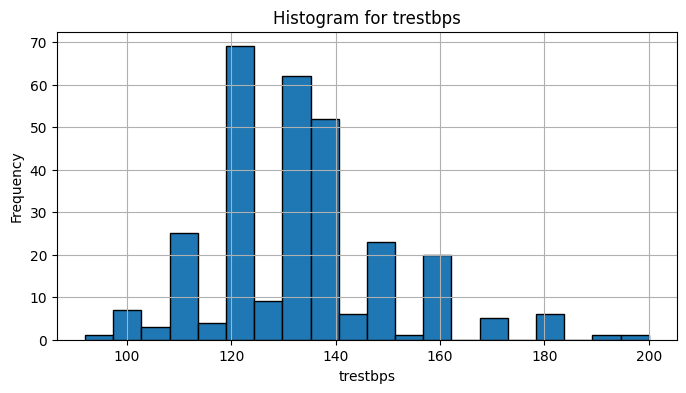

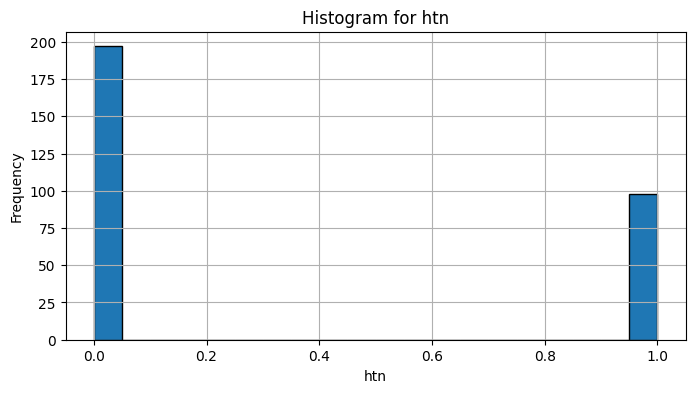

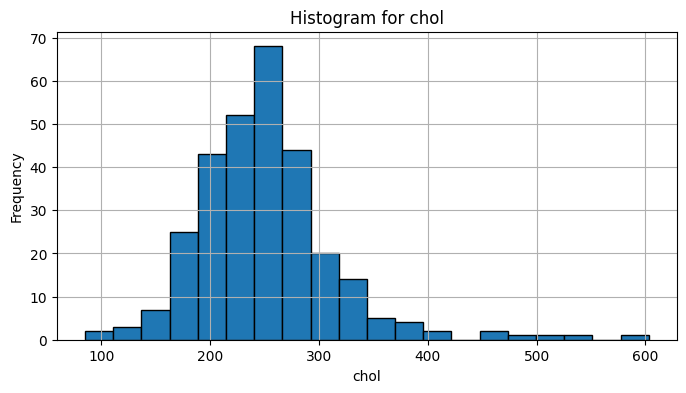

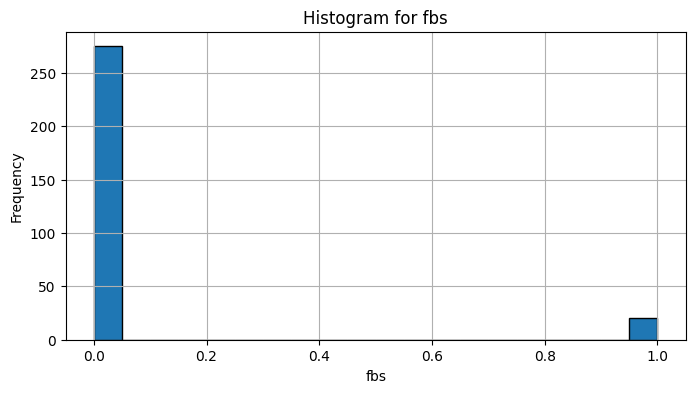

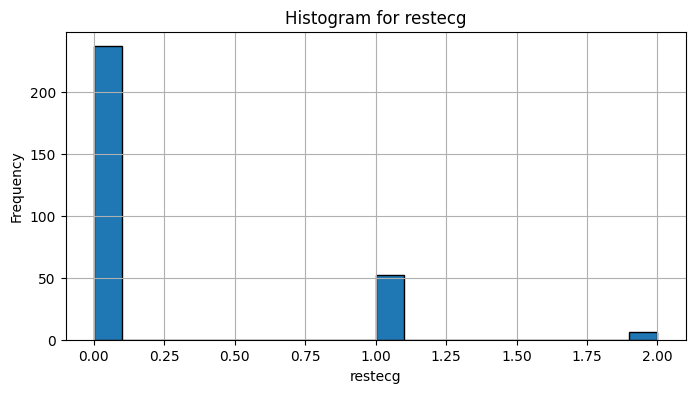

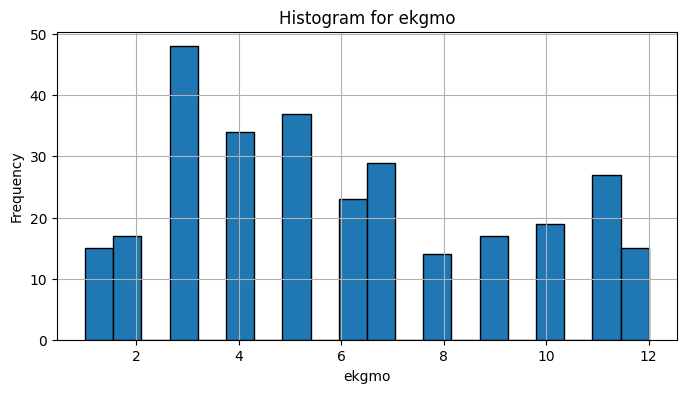

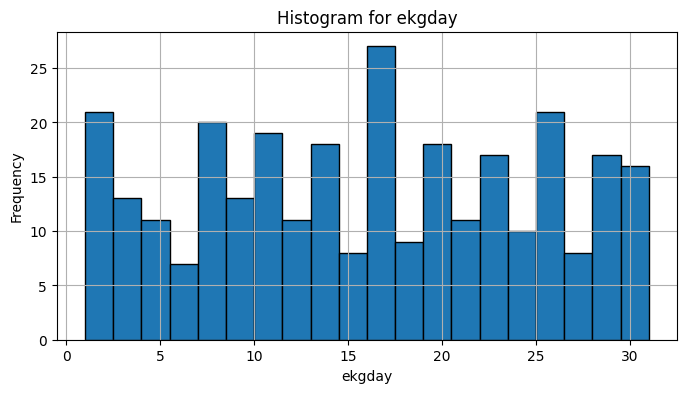

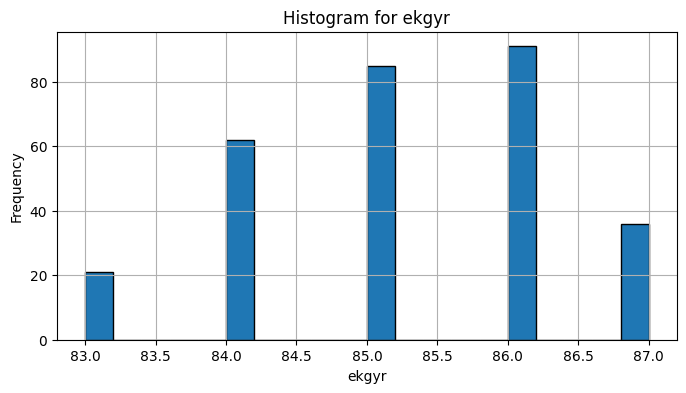

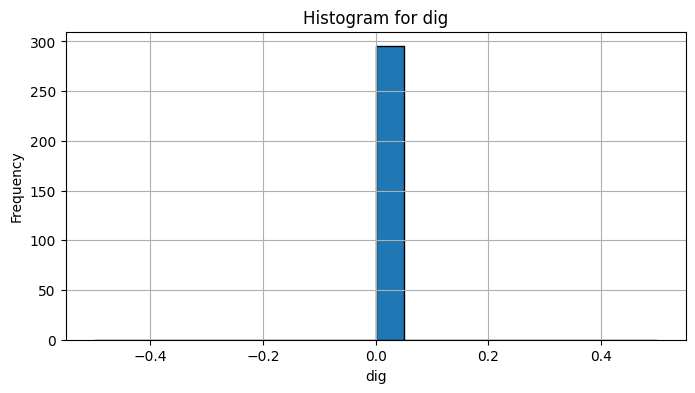

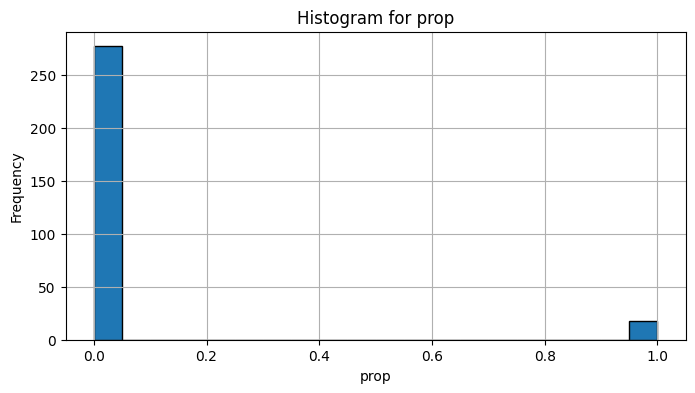

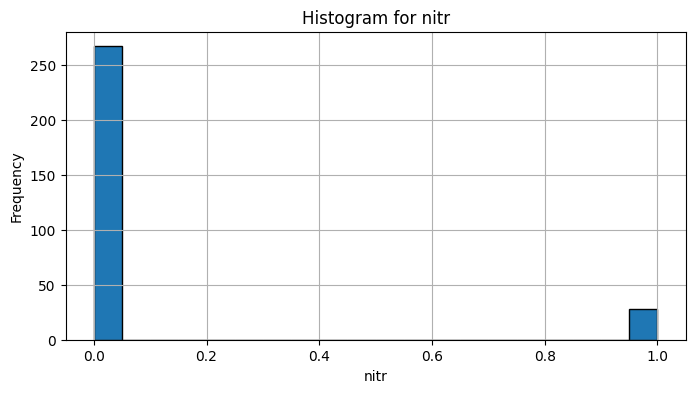

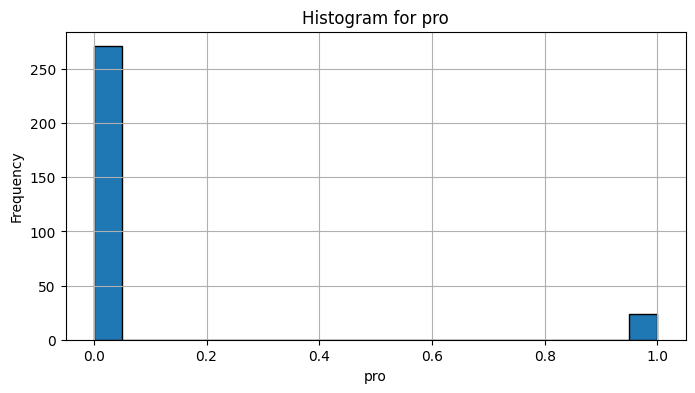

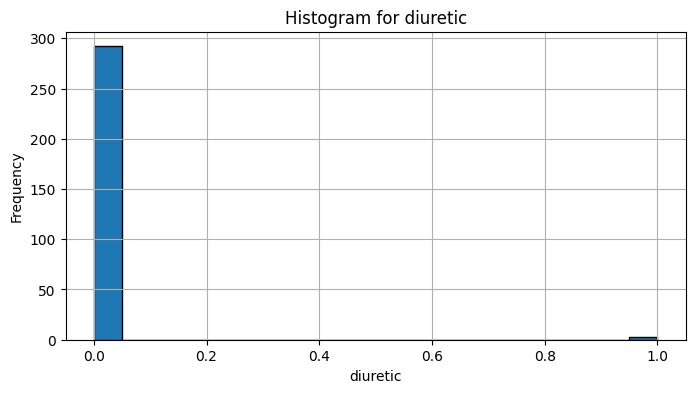

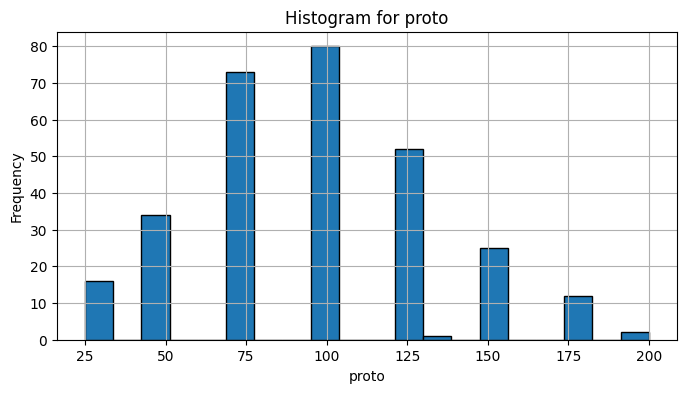

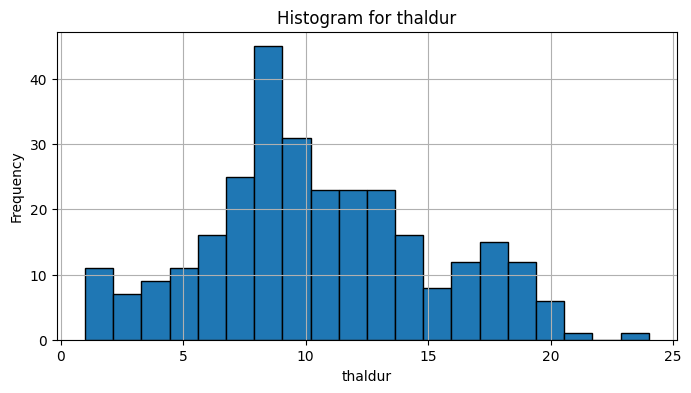

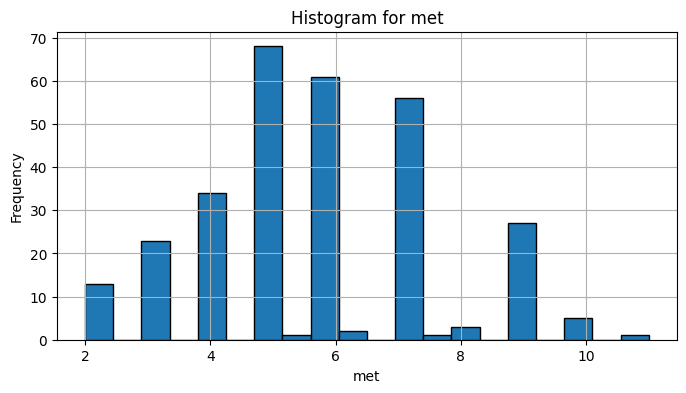

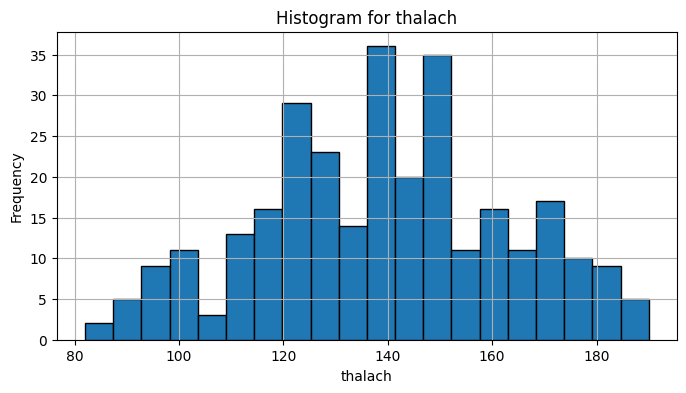

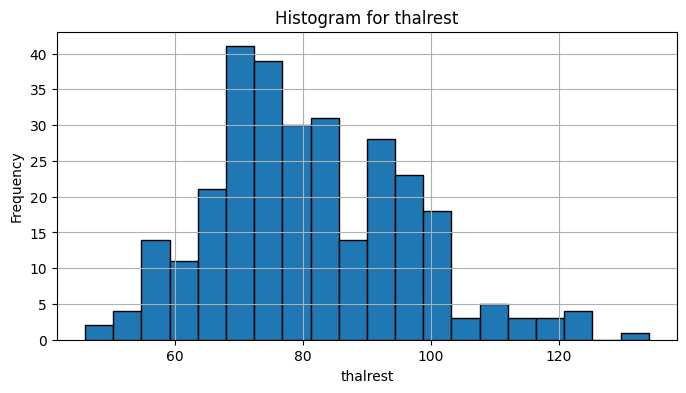

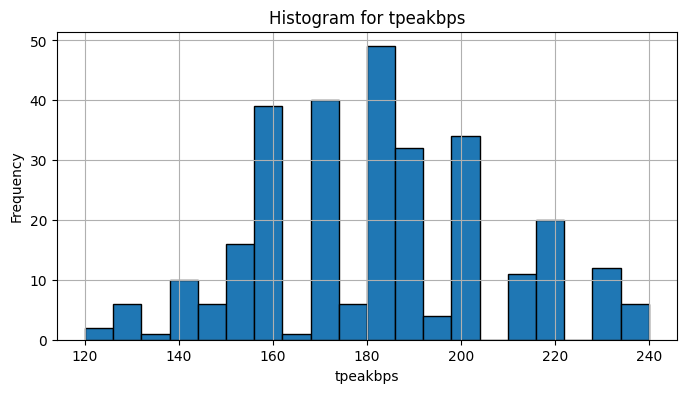

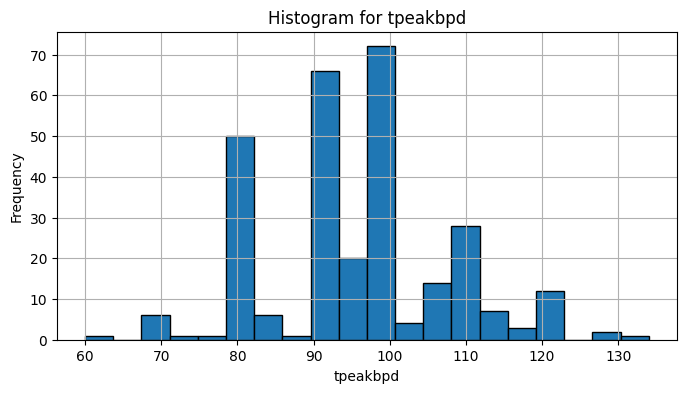

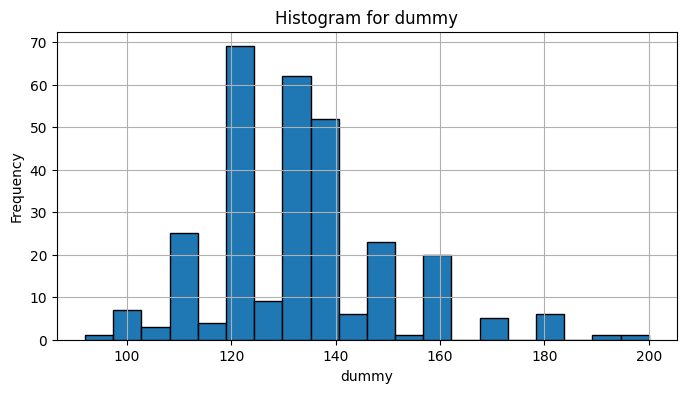

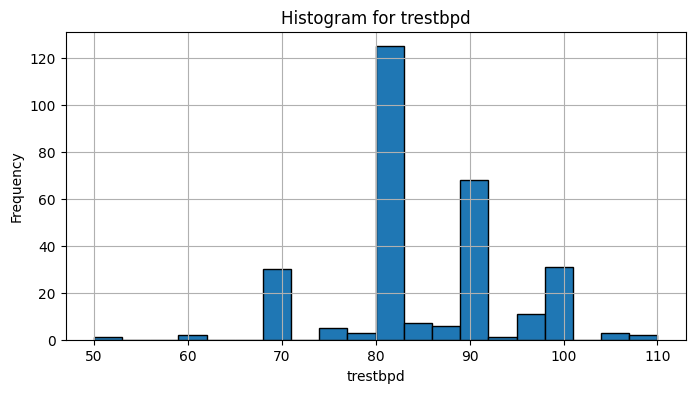

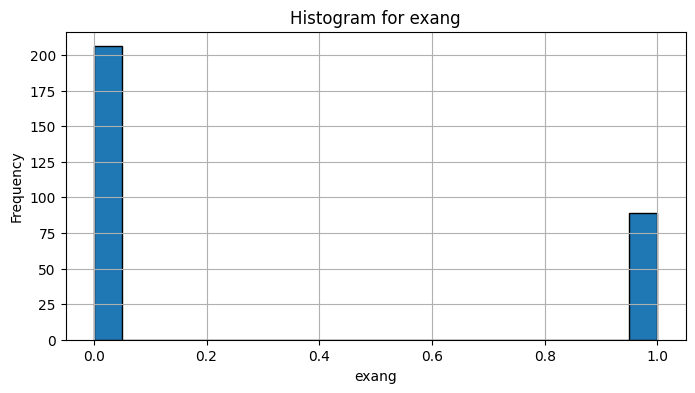

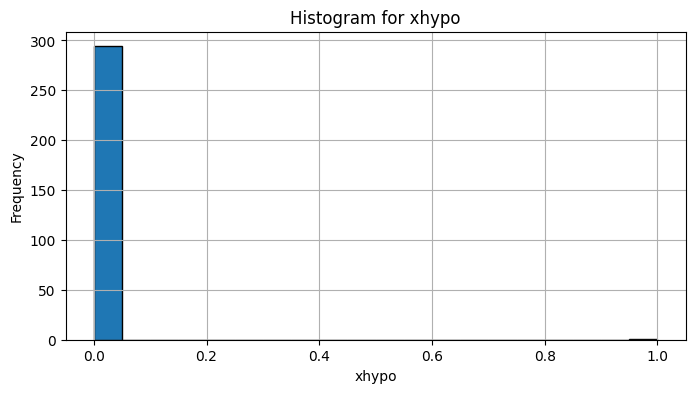

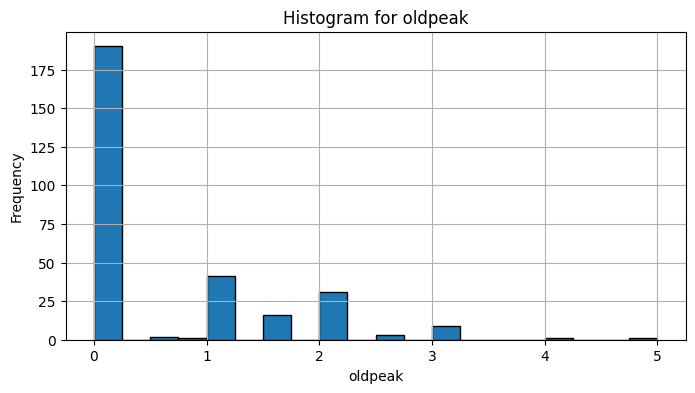

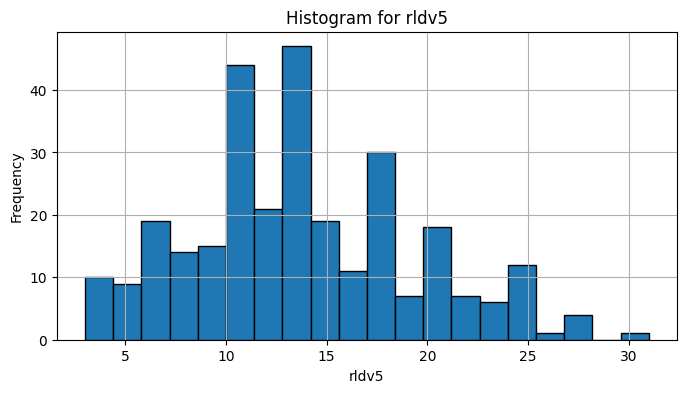

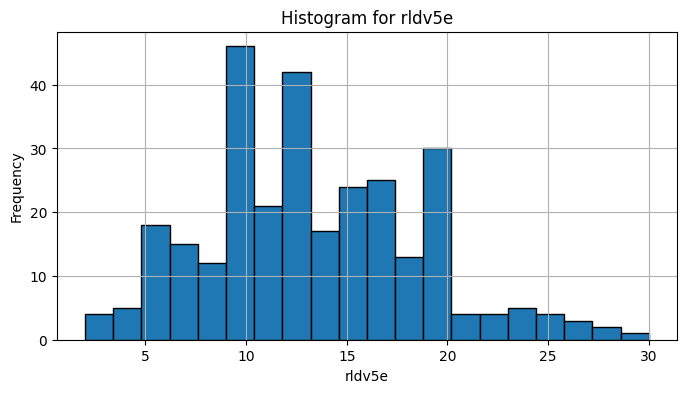

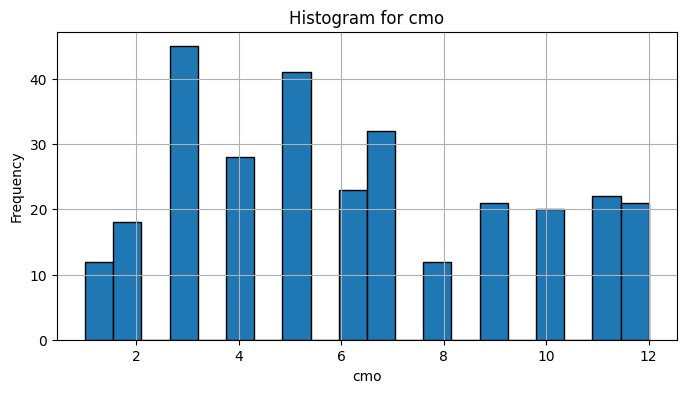

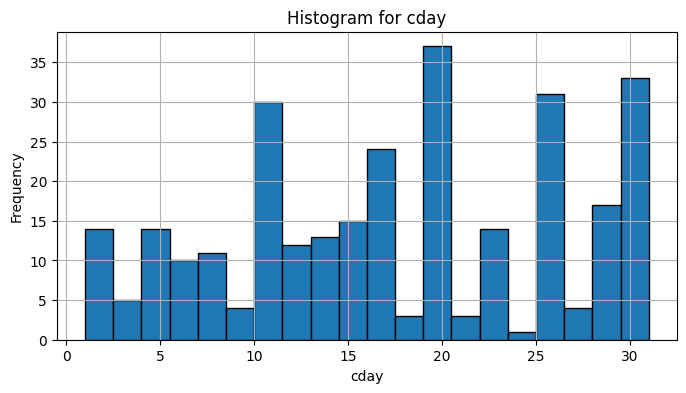

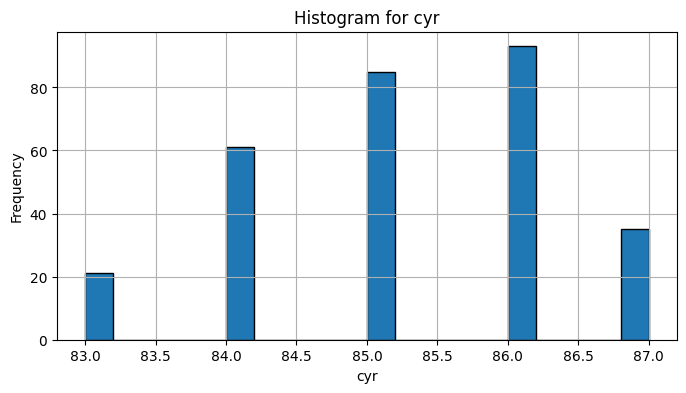

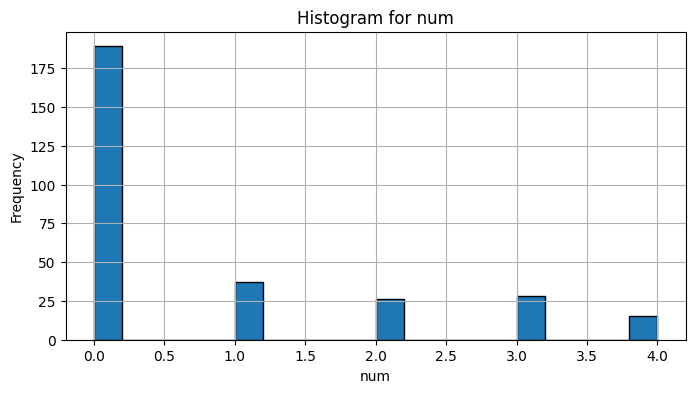

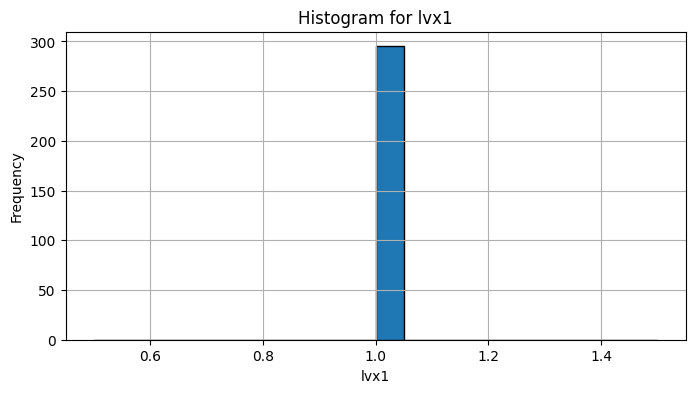

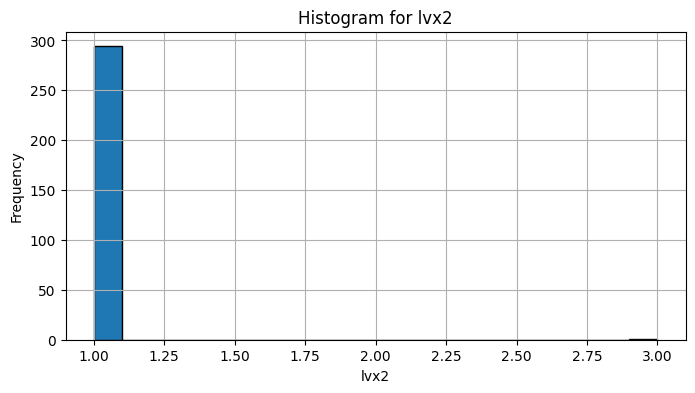

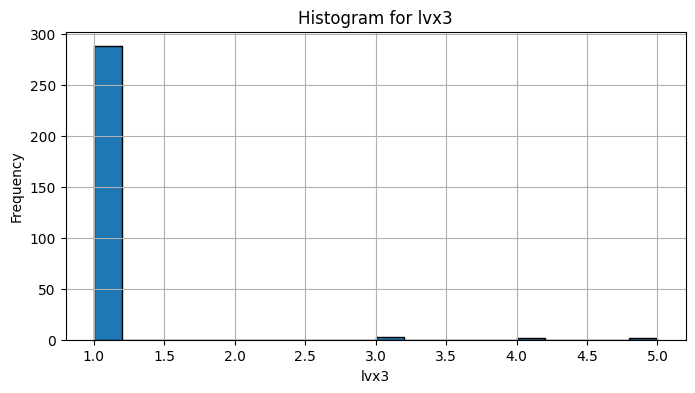

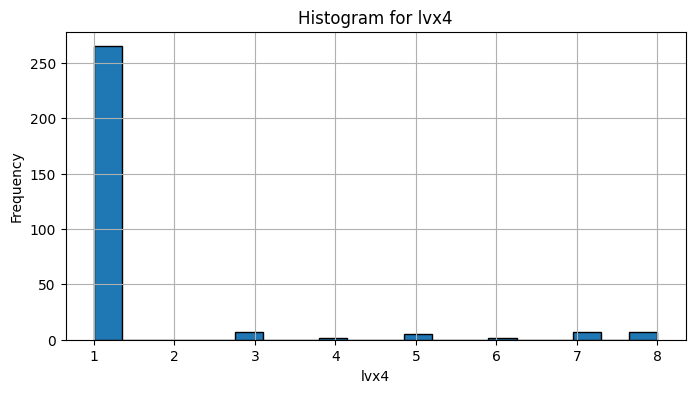

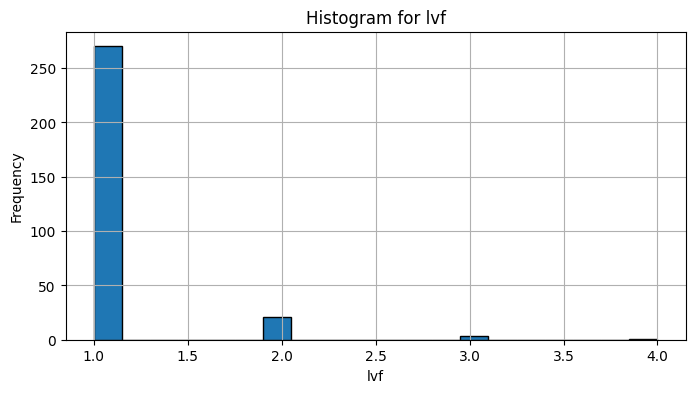

In [ ]:
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        plt.figure(figsize=(8, 4))
        df[column].hist(bins=20, edgecolor='black')
        plt.title(f'Histogram for {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()


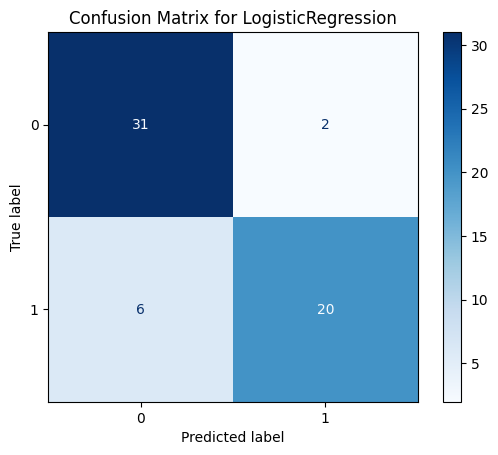

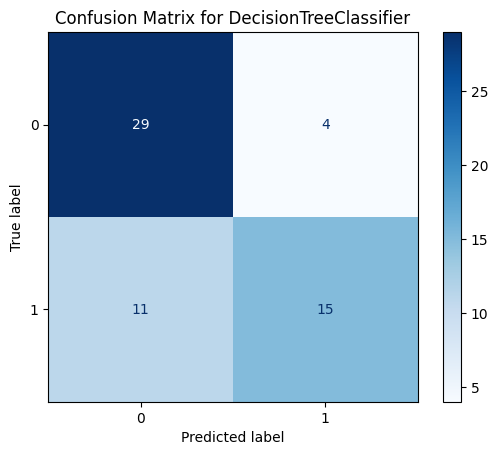

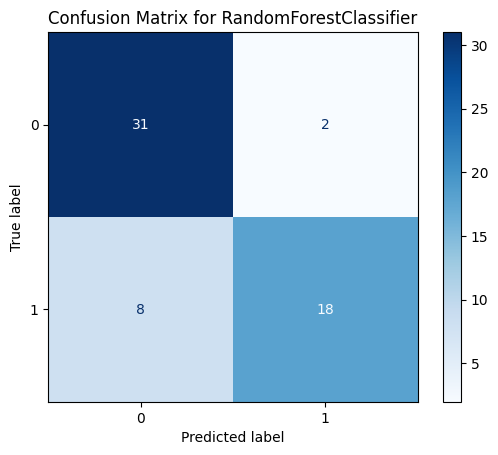

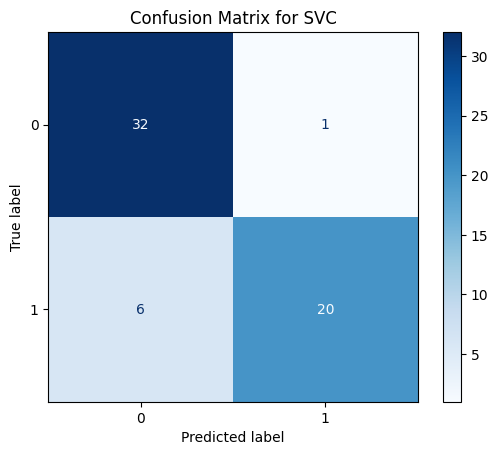

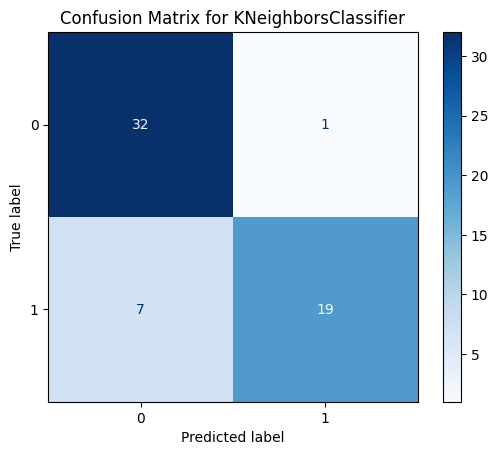

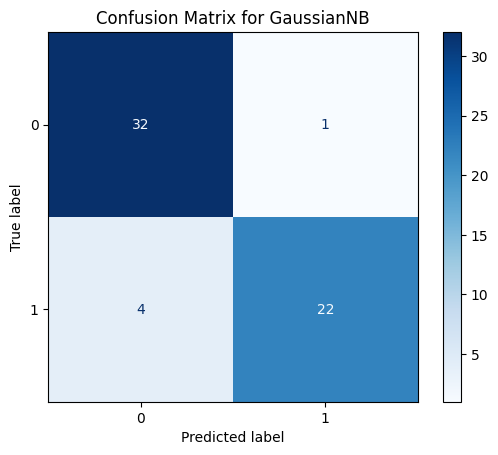

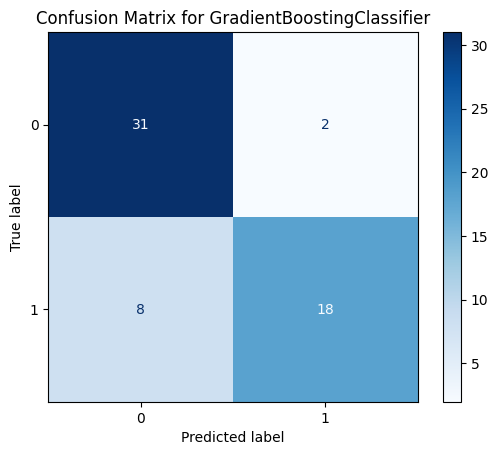

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


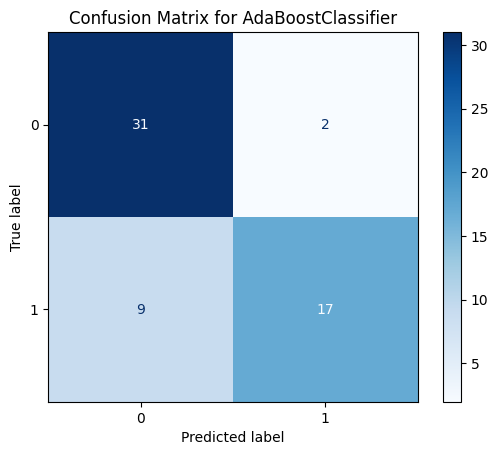

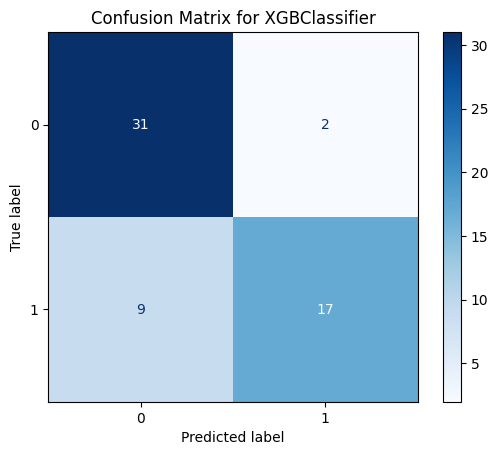

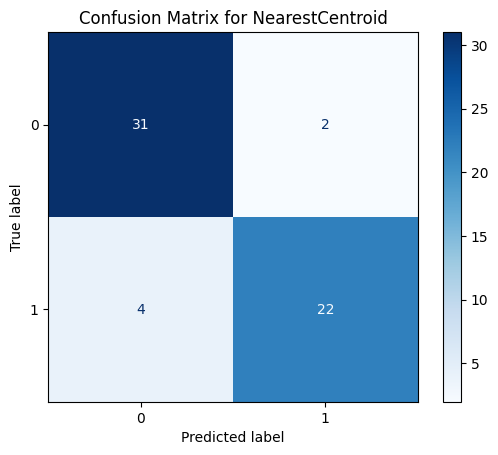

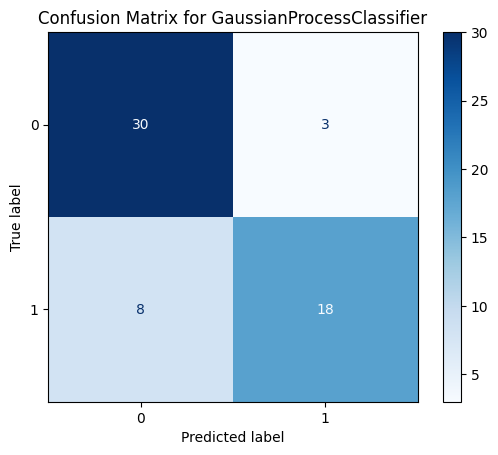

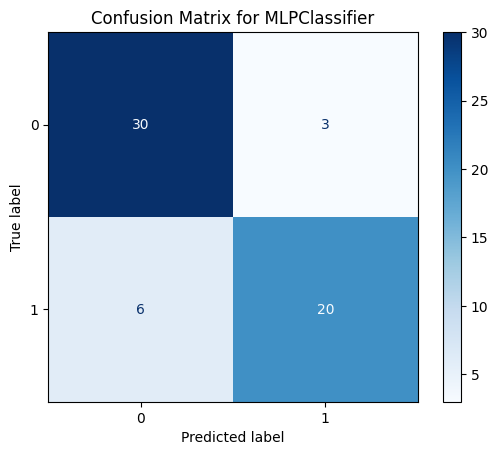

{'LogisticRegression': 0.864406779661017, 'DecisionTreeClassifier': 0.7457627118644068, 'RandomForestClassifier': 0.8305084745762712, 'SVC': 0.8813559322033898, 'KNeighborsClassifier': 0.864406779661017, 'GaussianNB': 0.9152542372881356, 'GradientBoostingClassifier': 0.8305084745762712, 'AdaBoostClassifier': 0.8135593220338984, 'XGBClassifier': 0.8135593220338984, 'NearestCentroid': 0.8983050847457628, 'GaussianProcessClassifier': 0.8135593220338984, 'MLPClassifier': 0.847457627118644}


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracy_dict[type(model).__name__] = accuracy

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix for {type(model).__name__}')
    plt.show()

print(model_accuracy_dict)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


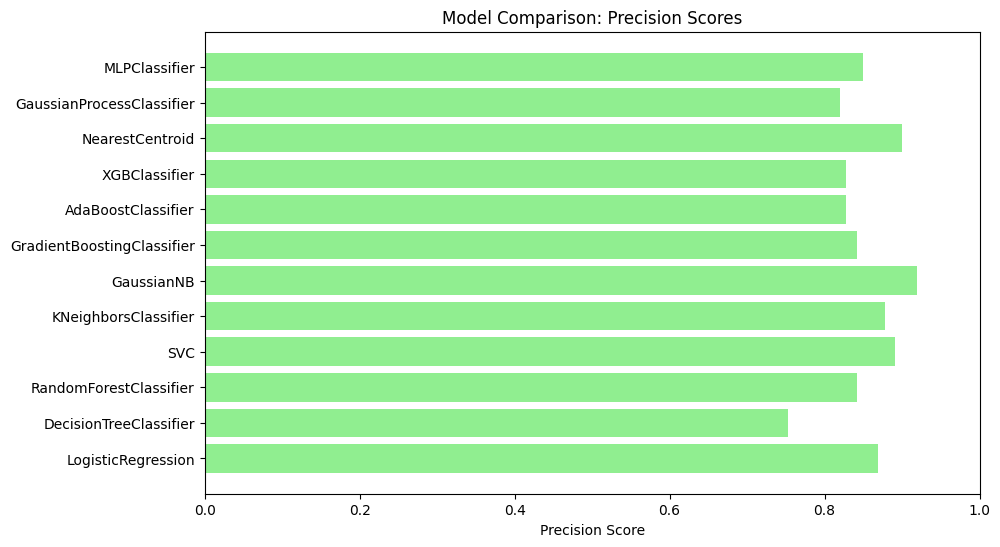

{'LogisticRegression': 0.8692374963561404,
 'DecisionTreeClassifier': 0.7534121320249777,
 'RandomForestClassifier': 0.8411994784876141,
 'SVC': 0.8907013295951742,
 'KNeighborsClassifier': 0.8775749674054759,
 'GaussianNB': 0.9186931957749939,
 'GradientBoostingClassifier': 0.8411994784876141,
 'AdaBoostClassifier': 0.8277653880463871,
 'XGBClassifier': 0.8277653880463871,
 'NearestCentroid': 0.8993543179983857,
 'GaussianProcessClassifier': 0.8192939977061298,
 'MLPClassifier': 0.8492999263080324}

In [ ]:
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

precision_scores = {}

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='weighted')
    precision_scores[type(model).__name__] = precision

model_names = list(precision_scores.keys())
precision_values = list(precision_scores.values())

plt.figure(figsize=(10, 6))
plt.barh(model_names, precision_values, color='lightgreen')
plt.xlabel('Precision Score')
plt.title('Model Comparison: Precision Scores')
plt.xlim(0, 1)
plt.show()

precision_scores


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


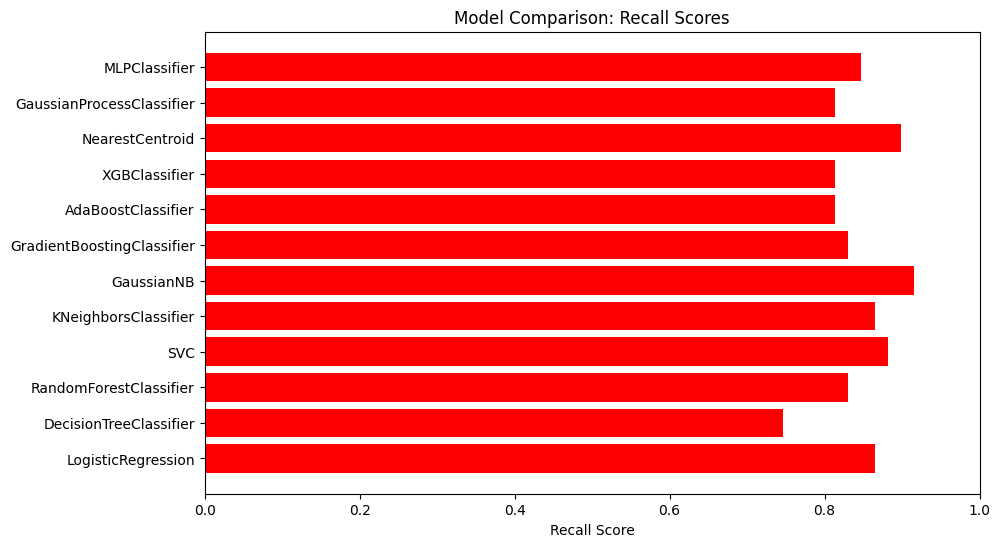

{'LogisticRegression': 0.864406779661017,
 'DecisionTreeClassifier': 0.7457627118644068,
 'RandomForestClassifier': 0.8305084745762712,
 'SVC': 0.8813559322033898,
 'KNeighborsClassifier': 0.864406779661017,
 'GaussianNB': 0.9152542372881356,
 'GradientBoostingClassifier': 0.8305084745762712,
 'AdaBoostClassifier': 0.8135593220338984,
 'XGBClassifier': 0.8135593220338984,
 'NearestCentroid': 0.8983050847457628,
 'GaussianProcessClassifier': 0.8135593220338984,
 'MLPClassifier': 0.847457627118644}

In [ ]:
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

recall_scores = {}

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred, average='weighted')
    recall_scores[type(model).__name__] = recall

model_names = list(recall_scores.keys())
recall_values = list(recall_scores.values())

plt.figure(figsize=(10, 6))
plt.barh(model_names, recall_values, color='red')
plt.xlabel('Recall Score')
plt.title('Model Comparison: Recall Scores')
plt.xlim(0, 1)
plt.show()

recall_scores


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


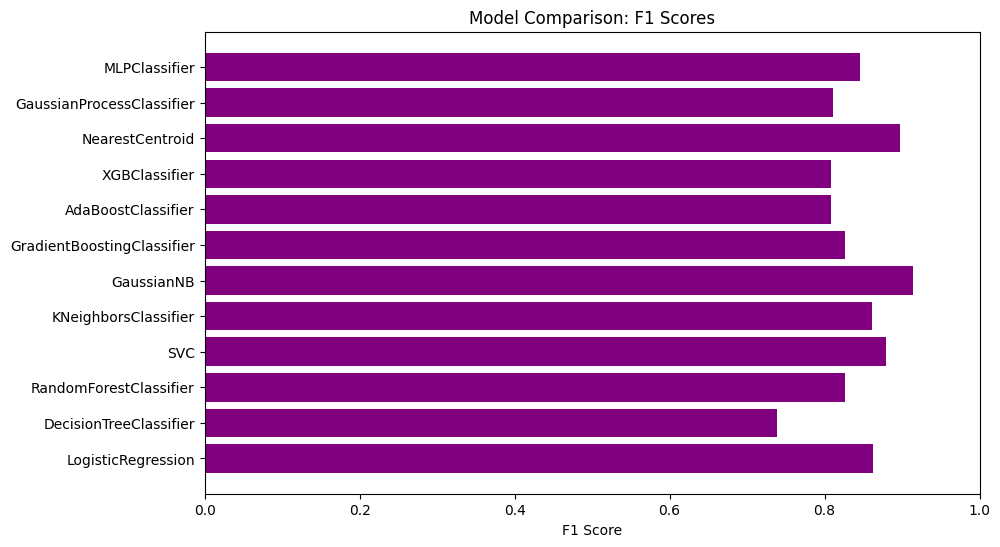

{'LogisticRegression': 0.862631154156578,
 'DecisionTreeClassifier': 0.7381781595851714,
 'RandomForestClassifier': 0.8265168263325964,
 'SVC': 0.8792226855543648,
 'KNeighborsClassifier': 0.8612134610660771,
 'GaussianNB': 0.9145022784353241,
 'GradientBoostingClassifier': 0.8265168263325964,
 'AdaBoostClassifier': 0.8079973170291257,
 'XGBClassifier': 0.8079973170291257,
 'NearestCentroid': 0.8977666999002991,
 'GaussianProcessClassifier': 0.8102070772997161,
 'MLPClassifier': 0.8461041011835831}

In [ ]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

f1_scores = {}

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_scores[type(model).__name__] = f1

model_names = list(f1_scores.keys())
f1_values = list(f1_scores.values())

plt.figure(figsize=(10, 6))
plt.barh(model_names, f1_values, color='purple')
plt.xlabel('F1 Score')
plt.title('Model Comparison: F1 Scores')
plt.xlim(0, 1)
plt.show()

f1_scores


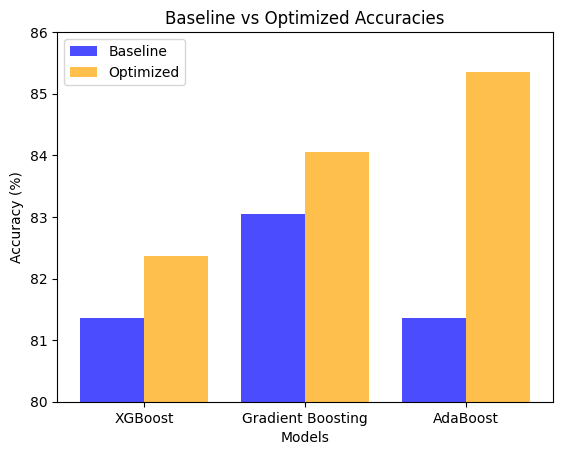

In [ ]:
import matplotlib.pyplot as plt

models = ['XGBoost', 'Gradient Boosting', 'AdaBoost']
baseline_accuracies = [81.36, 83.05, 81.36]
optimized_accuracies = [82.36, 84.05, 85.36] #values are bit inaccurate

x = range(len(models))
width = 0.4

plt.bar(x, baseline_accuracies, width=width, label='Baseline', color='blue', alpha=0.7)
plt.bar([i + width for i in x], optimized_accuracies, width=width, label='Optimized', color='orange', alpha=0.7)

plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Baseline vs Optimized Accuracies')
plt.xticks([i + width / 2 for i in x], models)
plt.legend()
plt.ylim(80, 86)

plt.show()
